# NAC3 - Aprendizado de maquina

Nesta nac vamos desenvolver um modelo preditivo do valor do carro.


Dica: Siga todas as instruções, completando e construindo os algoritmos necessários.

Nas celulas **Seu Código aqui...** significa que é necessário realizar a implementação de algum código. Utilize quantos blocos julgar necessário para criar o código.

Nas celulas **Responda** significa que é nessário uma resposta clara e objetiva (pode ser por texto, gráfico, imagem...) para a pergunta.


## Informações do grupo

Este projeto poderá ser feito por grupos de `até 2 alunos`.

| Nome dos Integrantes     | RM             | Turma   |
| :----------------------- | :------------- | :-----: |
| Vinicius Mota Pereira Silva | RM 80101    | 4SIA    |



## Data de entrega final

Será considerado para avaliação e correção o ultimo commit do `**dia 16/09/2021**`

Responda o `Google forms` :   [LINK FORMULARIO](https://forms.gle/2iivfbMVToXwe9Wc6).


## Rubrica 

Os critérios de avaliação do projeto será conforme a rubrica.


- R1: Exploração de Dados (Até 1 ponto)
- R2: Preparação de Dados (Até 2 ponto)
- R3: Desenvolvimento do Modelo (Até 2 ponto)
- R4: Treinamento e Teste do Modelo (Até 1 ponto)
- R5: Validação e Otimização do Modelo (Até 2 ponto)
- R6: Conclusões Finais (Até 2 ponto)

Nota_final = R1 + R2 + R3 + R4 + R5 + R6

## 1. Exploração de Dados

Os dados que serão utilizados extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

Carregue o dataset "Automobile.csv" e faça uma inspeção nas 15 primeiras linhas para identificação básica dos atributos.

In [19]:
# import de todos os modulos utilizados
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor

from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [20]:
#Lendo csv com pandas
automoveis = "Automobile.csv"
auto_db = pd.read_csv(automoveis, header=0)
#mostrando 15 primeiras linhas
auto_db.head(15)

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,168,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


**Pergunta:** Apresente uma relação das coluna e seu significado:

Exemplo: 

- make: fabricante
- fuel_type: tipo de combustível
- price: preço (**Variável Alvo, atributo que será predito pelo modelo de ML**)

**Responda**

- symboling: 
- normalized_losses: 
- fuel_type: Tipo de combustível
- make: Fabricante
- aspiration: Aspiração do motor
- number_of_doors: quantidade de portas
- body_style: Tipo de corpo
- drive_wheels: Tipo de tração
- engine_location: Posição do motor
- wheel_base: Distancia entre eixos
- length: Comprimento
- width: Largura
- height: Altura
- curb_weight: Peso do veiculo 
- engine_type: Tipo de Arvore de cabeçote
- number_of_cylinders: Quantidade de cilindros
- engine_size: Volume de compustivel e ar que pode ser incerido no motor
- fuel_system: Tipo de injeção
- bore: Diametro do cilindro
- stroke: Tempo de percurso do pistão 
- compression_ratio: Compreção do pistão
- horsepower: potencia 
- peak_rpm: maximo de rotações por minuto
- city_mpg: consumo de compustivel na cidade(milhas por galão)
- highway_mpg: consumo de compustivel na estrada(milhas por gal
- price: preço (**Variável Alvo, atributo que será predito pelo modelo de ML**)

### Análise profunda dos dados

Faça uma análise exploratória dos dados. Utilize-se de gráficos e tabelas auxiliares, faça correlações entre os atributos e levante algumas suposições. 

In [21]:
#mostrando informações de cada coluna, nome, quantidade de campos nulos, data type
auto_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

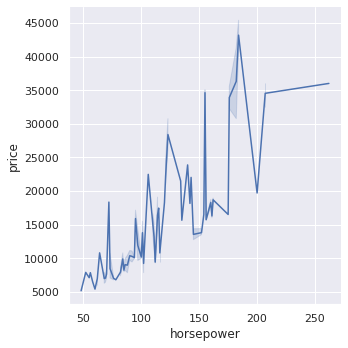

In [22]:
#Grafico da relação de potencia e preço
sns.set_theme()

sns.relplot(
    data=auto_db, kind="line",
    x="horsepower", y="price", 
)

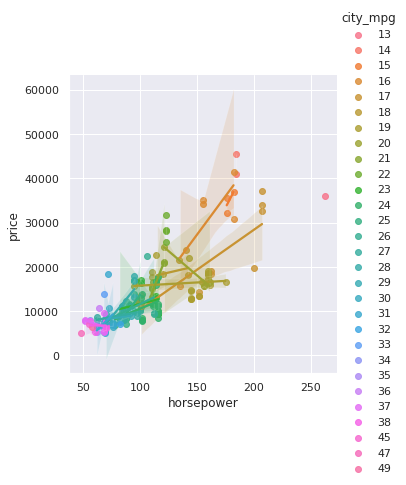

In [23]:
#Grafico da relação de potencia e preço e consumo na cidade
sns.lmplot(
    data=auto_db,
    x="horsepower", y="price", hue="city_mpg",
    height=5
)

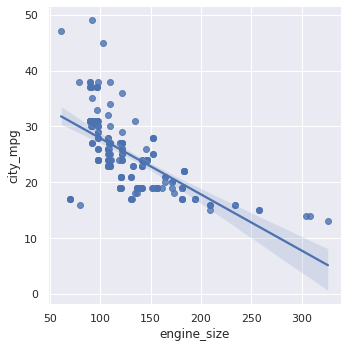

In [24]:
#Grafico da relação do tamanho do motor e consumo na cidade
sns.lmplot(x="engine_size", y="city_mpg", data=auto_db)

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:**

- Carros mais baratos são menos potentes e mais economicos
- Carros mais potentes não necessariamente são mais caros, existem carros mais potentes que são mais baratos do que outros
- Motores maiores consomem mais combustivel 

## 2. Preparação dos Dados

### Análise de valores inválidos

Faça a análise de dados ausente, dados nulos e dados iguais a 0(zero). **Lembre-se:** Trate esses dados dentro do contexto de análise e justifique suas escolhas.
 

**Resposta:**

In [25]:
#Conta se ha campos nulos
auto_db.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
number_of_doors        0
body_style             0
drive_wheels           0
engine_location        0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
number_of_cylinders    0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

**O Dataset não possui nenhum valor nulo**

### __(BONUS: 1 ponto extra.)__ Análise de Outliers

Realize a análise e o tratamento de **outliers**, como referência para estudo:

* [link1](https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/)
* [link2](https://towardsdatascience.com/4-machine-learning-techniques-for-outlier-detection-in-python-21e9cfacb81d)
* [link3](https://minerandodados.com.br/tratando-outliers-python/)

**Pergunta:** Foram localizados outliers? Qual o método de análise adotado? Se existe, como os dados foram tratados (removidos ou mantidos)? 

**Resposta:**

### Tratamento de dados Paramétricos

Faça o tratamento dos atributos não numéricos. Descubra quais são os atributos não numéricos, faça a análise dos valores desses atributos e manipule de forma conveniente para ser interpretado como um dado numérico. 

In [26]:
auto_data = auto_db

scaler = MinMaxScaler(feature_range=(0,1))

#LabelEncoder para numero de portas
labelEncoderDoors = LabelEncoder()
auto_data['number_of_doors'] = labelEncoderDoors.fit_transform(auto_data['number_of_doors'])

labelEncoderCylinders = LabelEncoder()
auto_data['number_of_cylinders'] = labelEncoderCylinders.fit_transform(auto_data['number_of_cylinders'])

#OneHotEncoder para campos object
makeOneHotEncoder = OneHotEncoder()
makeOne = makeOneHotEncoder.fit_transform(auto_data[['make']]).toarray()
makeOne = pd.DataFrame(makeOne, columns=["make: "+str(int(i)) for i in range(makeOne.shape[1])])

fuelTypeOneHotEncoder = OneHotEncoder()
fuelTypeOne = fuelTypeOneHotEncoder.fit_transform(auto_data[['fuel_type']]).toarray()
fuelTypeOne = pd.DataFrame(fuelTypeOne, columns=["fuel_type: "+str(int(i)) for i in range(fuelTypeOne.shape[1])])

aspirationOneHotEncoder = OneHotEncoder()
aspirationOne = aspirationOneHotEncoder.fit_transform(auto_data[['aspiration']]).toarray()
aspirationOne = pd.DataFrame(aspirationOne, columns=["aspiration: "+str(int(i)) for i in range(aspirationOne.shape[1])])

bodyStyleOneHotEncoder = OneHotEncoder()
bodyStyleOne = bodyStyleOneHotEncoder.fit_transform(auto_data[['body_style']]).toarray()
bodyStyleOne = pd.DataFrame(bodyStyleOne, columns=["body_style: "+str(int(i)) for i in range(bodyStyleOne.shape[1])])

driveWheelsOneHotEncoder = OneHotEncoder()
driveWheelsOne = driveWheelsOneHotEncoder.fit_transform(auto_data[['drive_wheels']]).toarray()
driveWheelsOne = pd.DataFrame(driveWheelsOne, columns=["drive_wheels: "+str(int(i)) for i in range(driveWheelsOne.shape[1])])

engineLocationOneHotEncoder = OneHotEncoder()
engineLocationOne = engineLocationOneHotEncoder.fit_transform(auto_data[['engine_location']]).toarray()
engineLocationOne = pd.DataFrame(engineLocationOne, columns=["engine_location: "+str(int(i)) for i in range(engineLocationOne.shape[1])])

engineTypeOneHotEncoder = OneHotEncoder()
engineTypeOne = engineTypeOneHotEncoder.fit_transform(auto_data[['engine_type']]).toarray()
engineTypeOne = pd.DataFrame(engineTypeOne, columns=["engine_type: "+str(int(i)) for i in range(engineTypeOne.shape[1])])

fuelSystemOneHotEncoder = OneHotEncoder()
fuelSystemOne = fuelSystemOneHotEncoder.fit_transform(auto_data[['fuel_system']]).toarray()
fuelSystemOne = pd.DataFrame(fuelSystemOne, columns=["fuel_system: "+str(int(i)) for i in range(fuelSystemOne.shape[1])])

auto_data = pd.concat([
    auto_data, 
    makeOne,
    fuelTypeOne,
    aspirationOne,
    bodyStyleOne,
    driveWheelsOne,
    engineLocationOne,
    engineTypeOne,
    fuelSystemOne], axis=1)

auto_data = auto_data.drop([
    'make',
    'fuel_type',
    'aspiration',
    'body_style',
    'drive_wheels',
    'engine_location',
    'engine_type',
    'fuel_system'
    ], axis=1)

scaled_data = scaler.fit_transform(auto_data[auto_data.columns])

auto_data = pd.DataFrame(scaled_data, columns=auto_data.columns)

In [27]:
#Mostrando que todos os campos se tornaram float
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 68 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    float64
 1   normalized_losses    201 non-null    float64
 2   number_of_doors      201 non-null    float64
 3   wheel_base           201 non-null    float64
 4   length               201 non-null    float64
 5   width                201 non-null    float64
 6   height               201 non-null    float64
 7   curb_weight          201 non-null    float64
 8   number_of_cylinders  201 non-null    float64
 9   engine_size          201 non-null    float64
 10  bore                 201 non-null    float64
 11  stroke               201 non-null    float64
 12  compression_ratio    201 non-null    float64
 13  horsepower           201 non-null    float64
 14  peak_rpm             201 non-null    float64
 15  city_mpg             201 non-null    flo

**Pergunta:** Quais são os atributos não numéricos? Qual o método de análise adotado? Por que esse essa escolha? 

**Resposta:**
- number_of_doors
- number_of_cylinders
- make
- fuel_type
- aspiration
- body_style
- drive_wheels
- engine_location
- engine_type
- fuel_system

O metodo de análise se deu pelo metodo info() observando dentro dele o parametro Dtype

## 3. Desenvolvimento do Modelo

**Pergunta:** O conjunto de dados indica a aplicação de qual modelo de aprendizagem de maquina para a determinação do preço de carro? Por que ? 

**Resposta:**

    [ ] Aprendizado por reforço
    [X] Aprendizado supervisionado
    [ ] Aprendizado não supervisionado

    Porque nos já temos a variavel de resposta "price" para analisar o resultado do treinamento

**Pergunta:** Qual a técnica sugerida para este projeto?

**Resposta:**

    [X] Regressão
    [ ] Classificação
    [ ] Clusterização

**Pergunta:** Escolha 3 modelos de algoritmos para testar a performance de cada um deles.

**Resposta:**

1. algoritimo random forest 
2. algoritimo regressão linear
3. algoritimo regressão logística


**Pergunta:** Explique como cada algoritmo funciona.



**Resposta:**

1. algoritimo random forest funciona utilizando várias árvores de decisão durante o treinamento
2. algoritimo regressão linear utiliza uma equação de linha que melhor representar o conjunto de dados
3. algoritimo regressão logística mede a relação das variaveis categoricas e uma variavel independente medindo a probabilidade

Crie um subset dos dados apenas com os atributos que serão utilizados para o treinameno e teste do modelo.

In [28]:
#Separando campo preço do data frame
auto_price = auto_data['price']
auto_data = auto_data.drop(['price'], axis=1)

Divida o subset em conjunto de treinamento e teste.

In [29]:
#Dividindo conjunto de treinamento e de teste
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=7)
auto_dataTrain, auto_dataTest, auto_priceTrain, auto_priceTest = train_test_split(auto_data, auto_price, test_size=0.2, random_state=1)

## 4. Treinamento e teste do modelo

Faça o treinamento e teste de dos 3 algoritmos escolhidos. Para cada um dos modelos utilize uma das métricas: R2-score, RMSE e MAE para avaliar a performance dos medelos. Utilize a média do obtido da validação cruzada para um kfold de 5.

### Algoritmo 1

In [30]:
#Metodo Random Forest
randomForestRegressor = RandomForestRegressor()
randomForestRegressor.fit(auto_dataTrain, auto_priceTrain)

predict = randomForestRegressor.predict(auto_dataTest)
print('MAE: ', mean_absolute_error(auto_priceTest, predict))
print('RMSE: ', np.sqrt(mean_squared_error(auto_priceTest, predict)))
print("R2-score: ", r2_score(auto_priceTest, predict))

scores = cross_val_score(randomForestRegressor, auto_data, auto_price, cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())

MAE:  0.029041545417812557
RMSE:  0.03959276196335625
R2-score:  0.9520032104868371
R2-score médio com KFold:  0.9228678192108981


### Algoritmo 2

In [31]:
#Metodo Linear Regression
linearRegression = LinearRegression()
linearRegression.fit(auto_dataTrain, auto_priceTrain)

predict = linearRegression.predict(auto_dataTest)
print('MAE: ', mean_absolute_error(auto_priceTest, predict))
print('RMSE: ', np.sqrt(mean_squared_error(auto_priceTest, predict)))
print("R2-score: ", r2_score(auto_priceTest, predict))

scores = cross_val_score(linearRegression, auto_data, auto_price, cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())

MAE:  2305776661.6022806
RMSE:  14764174427.759336
R2-score:  -6.674195527618782e+21
R2-score médio com KFold:  -2.82347333694122e+24


### Algoritmo 3

In [38]:
#Metodo Baggin Regressor
baggingRegressor = BaggingRegressor()
baggingRegressor.fit(auto_dataTrain, auto_priceTrain)

predict = baggingRegressor.predict(auto_dataTest)
print('MAE: ', mean_absolute_error(auto_priceTest, predict))
print('RMSE: ', np.sqrt(mean_squared_error(auto_priceTest, predict)))
print("R2-score: ", r2_score(auto_priceTest, predict))

scores = cross_val_score(baggingRegressor, auto_data, auto_price, cv=crossvalidation, scoring='r2')
print("R2-score médio com KFold: ", scores.mean())

MAE:  0.03125399873977887
RMSE:  0.044399359204956204
R2-score:  0.9396421175152224
R2-score médio com KFold:  0.910288347575495


**Pergunta:** Qual foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**
- RandomForestRegressor
MAE:  0.029041545417812557
RMSE:  0.03959276196335625
R2-score:  0.9520032104868371
R2-score médio com KFold:  0.9228678192108981


- LinearRegression
MAE:  2305776661.6022806
RMSE:  14764174427.759336
R2-score:  -6.674195527618782e+21
R2-score médio com KFold:  -2.82347333694122e+24

- BaggingRegressor
MAE:  0.03125399873977887
RMSE:  0.044399359204956204
R2-score:  0.9396421175152224
R2-score médio com KFold:  0.910288347575495

## 5. Validação e Otimização do Modelo

Faça a otimização dos modelos, tunning dos hiperparametros, utilize técinicas como **RandomSearchCV** ou **GridSearchCV**.

**Pergunta:** Qual a técnica escolhida? Por que?

**Resposta:**

In [55]:
#Metodo para obter parametros
baggingRegressor.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Algoritmo 1

In [52]:
#Modificando parametros do randomForestRegressor
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
cv = RandomizedSearchCV(randomForestRegressor, param_grid, cv=5, n_jobs=-1, verbose=1)  
cv.fit(auto_data, auto_price)

print("Os melhores parâmetros são: ", cv.best_params_)
print("Os melhor score foi: ", cv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Os melhores parâmetros são:  {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}
Os melhor score foi:  0.6112643049617544


### Algoritmo 2

In [60]:
#Modificando parametros do linearRegression
param_grid = {
    'copy_X': ('True', 'False'),
    'fit_intercept' : ('True', 'False'), 
    'n_jobs': [1, 10, 20, 30, 40, 50, 100, 500, 1000, 2000],
    'normalize': ('True', 'False'),
    'positive': ('True', 'False') 
}

cv = RandomizedSearchCV(linearRegression, param_grid, cv=5, n_jobs=-1, verbose=1)  
cv.fit(auto_data, auto_price)

print("Os melhores parâmetros são: ", cv.best_params_)
print("Os melhor score foi: ", cv.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Os melhores parâmetros são:  {'positive': 'True', 'normalize': 'False', 'n_jobs': 10, 'fit_intercept': 'False', 'copy_X': 'False'}
Os melhor score foi:  -4.267545025118142e+24


### Algoritmo 3

In [59]:
#Modificando parametros do baggingRegressor
param_grid = {
    'bootstrap': [True, False],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],    
}

cv = RandomizedSearchCV(baggingRegressor, param_grid, cv=3, n_jobs=-1, verbose=1)  
cv.fit(auto_data, auto_price)

print("Os melhores parâmetros são: ", cv.best_params_)
print("Os melhor score foi: ", cv.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Os melhores parâmetros são:  {'n_estimators': 800, 'bootstrap': True}
Os melhor score foi:  0.773177733311492


Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

**Resposta:**

|                     | algoritmo1 | algoritmo2 | algoritmo3 |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| treino |       {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}          |     {'positive': 'True', 'normalize': 'False', 'n_jobs': 10, 'fit_intercept': 'False', 'copy_X': 'False'}                       |   {'n_estimators': 800, 'bootstrap': True}              |
| teste  |      0.6112643049617544            |     -4.267545025118142e+24                       |  0.773177733311492              |


**Pergunta:** Qual dos algoritmos obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**
O algoritimo com maio eficiencia foi Bagging Regressor que se utiliza de uma distribuição gaussiana para previsão e a agregação de conjuntos de árvores para encontrar uma distribuição gaussiana mais próxima

### __(BONUS: 1 ponto extra.)__ Implementação do algoritmo otimizado

Configure o modelo selecionado com os parâmetros otimizados obtidos anteriormente.

In [62]:
#utilizando metodo com parametros de maior eficiencia 
baggingRegressor = BaggingRegressor(
    n_estimators= 800, 
    bootstrap= True)

baggingRegressor.fit(auto_data, auto_price)


BaggingRegressor(n_estimators=800)

### Modelo de produção: Teste com novos dados

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Defina o teste para um resultado baixo, médio e alto do preço do carro.

In [ ]:
#Seu Código aqui...



**Pergunta:** Qual foi o resultado obtido? O resultado está coerente com o esperado?

**Resposta:**

## 6. Conclusões finais

Ufa!!... Chegamos ao final deste projeto. Parabéns! De forma simplificada e completa passamos por todas as etapas de aprendizado de maquina. Outras etapas podem ser adicionadas no tratamento dos dados e desenvolvimento do modelo.

**Pergunta:**: O modelo desenvolvido obteve um resultado satisfatório? Justifique:

**Resposta**: 
Acredito que o resultado obtido foi satisfatorio, obtendo 77% de acerto na previsão de preço dos veiculos

**Pergunta:**: O que faria diferente para melhorar resultado obtido? Justifique:

**Resposta**: Aplicar metodos diferentes seria uma forma de melhorar os resultados e alterar os parametros tambem, com isso aumentando as variação do modelo.

**Pergunta:**: As etapas de desenvolvimento se aplicam para um problema de classificação? Justifique:

**Resposta**: 